In [16]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [17]:
titanic_train = pd.read_csv("/home/jatin/Downloads/titanic/train.csv")

In [18]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
titanic_train['Age'].mean()

29.69911764705882

In [21]:
new_age_var = np.where(titanic_train['Age'].isnull(),30,titanic_train['Age'])

In [22]:
titanic_train['Age'] = new_age_var

In [23]:
label_encoder = preprocessing.LabelEncoder()

In [36]:
titanic_train['Sex']=label_encoder.fit_transform(titanic_train["Sex"])

In [37]:
titanic_train['Embarked'].fillna(method='pad',inplace=True)

In [38]:
titanic_train['Embarked']=label_encoder.fit_transform(titanic_train['Embarked'])

# Random Forest Classifier


In [39]:
rf_model =RandomForestClassifier(n_estimators=1000,max_depth=2,oob_score=True)

In [40]:
features = ['Sex','Pclass','SibSp','Embarked','Age','Fare','Parch']

In [41]:
rf_model.fit(X=titanic_train[features],y=titanic_train['Survived'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
print('OOB Accuracy:')
print(rf_model.oob_score_)

OOB Accuracy:
0.792368125701459


In [39]:
for features,imp in zip(features,rf_model.feature_importances_):
    print(features,imp)

Sex 0.4171655561156045
Pclass 0.19905961038349132
SibSp 0.04006078814235708
Embarked 0.04443420130319049
Age 0.06420280833527967
Fare 0.20367793478712623
Parch 0.031399100932950605


# Decision Tree Classifier on --Training Data

In [84]:
predictors = pd.DataFrame([titanic_train['Sex'],titanic_train['Pclass'],titanic_train['Age'],titanic_train['Fare']]).T

In [85]:
tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [86]:
tree_model.fit(X=predictors,y=titanic_train['Survived'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
tree_model.score(X=predictors,y=titanic_train['Survived'])

0.8911335578002245

In [88]:
with open("Titanic_pred.dot","w") as f:
    f = tree.export_graphviz(tree_model,feature_names=['Sex','Pclass','Fare','Age'],out_file=f);

# Prediticing The Testing Output -- Survival 

In [89]:
titanic_test = pd.read_csv("/home/jatin/Downloads/titanic/test.csv")

In [90]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
titanic_test['Age'].mean()

30.272590361445783

In [92]:
titanic_test['Fare'].fillna(method = 'pad',inplace = True)

In [93]:
new_age_var=np.where(titanic_test['Age'].isnull(),30,titanic_test['Age'])

In [94]:
titanic_test['Age'] = new_age_var

In [95]:
encoded_sex_test = label_encoder.fit_transform(titanic_test['Sex'])

In [96]:
encoded_emb_test = label_encoder.fit_transform(titanic_test['Embarked'])

In [97]:
test_features=pd.DataFrame([encoded_sex_test,titanic_test['Pclass'],titanic_test['Age'],titanic_test['Fare']]).T

In [98]:
test_pred = tree_model.predict(X=test_features)

In [99]:
Predicted_Output = pd.DataFrame({"PassengerID":titanic_test['PassengerId'],"Survived":test_pred})

In [100]:
Predicted_Output.to_csv("Output-1.csv",index=False)

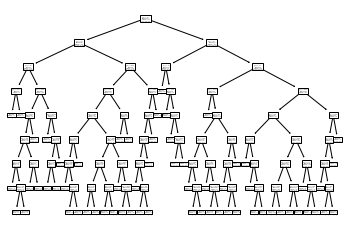

In [101]:
tree.plot_tree(tree_model);